In [365]:
import numpy as np
import sympy as sp
import math
import cmath
import matplotlib.pyplot as plt

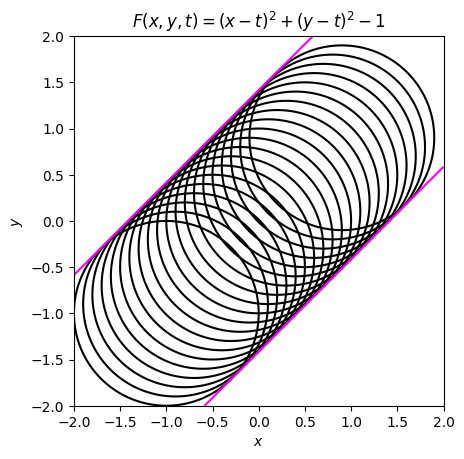

In [366]:
axlim = 2
x = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x, x)

for t in np.arange(-1,1,0.1):
    Fxy = (X-t)**2 + (Y-t)**2  - 1
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy1 = Y - X + math.sqrt(2)
Exy2 = Y - X - math.sqrt(2)
plt.contour(X, Y, Exy1, levels=[0], colors='magenta')
plt.contour(X, Y, Exy2, levels=[0], colors='magenta')
plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = (x-t)^2 + (y-t)^2 - 1$')
plt.show()

In [367]:
def equation_roots(a, b, c):
    discriminant = b**2 - 4*a*c 
     # checking condition for discriminant
    if discriminant > 0:
        sqrt_discriminant = math.sqrt(discriminant)  # Use cmath.sqrt for complex numbers
        root1 = (-b + sqrt_discriminant) / (2 * a)
        root2 = (-b - sqrt_discriminant) / (2 * a)
        print(f"Real and different roots {root1}, {root2}")
    elif discriminant == 0:
        root1 = -b / (2 * a)
        root2 = -b / (2 * a)
        print(f"Real and same roots {root1}, {root2}")
    else:
        sqrt_discriminant = cmath.sqrt(discriminant)  # Use cmath.sqrt for complex numbers
        root1 = (-b + sqrt_discriminant) / (2 * a)
        root2 = (-b - sqrt_discriminant) / (2 * a)
        #root1 = root1.real
        #root2 = root2.real
        print("Complex Roots {root1}, {root2}")
    return root1, root2

In [368]:
def find_closest_root(roots, t_min, t_max, previous_parameter):
    closest_root = None
    min_difference = float('inf')  # Initialize with a large value

    for root in roots:
        # Calculate the absolute difference
        difference = abs(root - previous_parameter)

        # Check if the root is within the interval and is different from the previous parameter
        if t_min <= root <= t_max and difference > 0:  # Added condition to check for difference
            # Check if this root is closer than the previous closest root
            if difference < min_difference:
                min_difference = difference
                closest_root = root

    return closest_root

In [369]:
def euler_method(function, x_start, y_start, t_min, t_max):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    h = 0.05
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')

    while parameter <= t_max:        
        # Calculate the gradient
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})
       
        #gradient_x = -1
        #gradient_y = 1

        print(f"Gradient at {x_start}, {y_start} and t={parameter}: ({gradient_x},{gradient_y})")

        x_new = x_start + h * gradient_y
        y_new = y_start + h * (-gradient_x)
        print(f"New point: ({x_new}, {y_new})")
        list_x.append(x_new)
        list_y.append(y_new)
        
        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        a = 2
        b = -2*(x_new + y_new)
        c = x_new**2 + y_new**2 - 1

        D = b**2 - (4*a*c)
        if (D >= 0):
            sol1 = (-b-cmath.sqrt(D))/(2*a)
            sol2 = (-b+cmath.sqrt(D))/(2*a)
            if (sol1==sol2):
                closest_root = sol1
            else: 
                if (parameter == sol1):
                    closest_root = sol2
                elif (parameter == sol2):
                    closest_root = sol1
                else:
                    closest_root = sol1
            print(f"Algorithm has chosen {closest_root} as a root")
            parameter = closest_root
        else:
            print("No real solution")
            parameter += 0.01

        '''roots = equation_roots(a, b, c)
        print(f"Roots are {roots}")
        new_parameter = find_closest_root(roots, t_min, t_max, parameter)
        print(f"Algorithm has chosen {new_parameter} as a root")
        list_parameter.append(new_parameter) 

        parameter = new_parameter

        D = b**2 - (4*a*c)
        if (D >= 0):
            sol1 = (-b-cmath.sqrt(D))/(2*a)
            sol2 = (-b+cmath.sqrt(D))/(2*a)
            new_parameter = find_closest_root([sol1, sol2], t_min, t_max, parameter)
            print(f"Algorithm has chosen {new_parameter} as a root")
            parameter = new_parameter
        else:
            print("There is no real solution")
            parameter += 0.02'''


Starting point is (-1.7071067811865475,-0.2928932188134523) and t=-1
Gradient at -1.7071067811865475, -0.2928932188134524 and t=-1: (-1.41421356237309,1.41421356237310)
New point: (-1.63639610306789, -0.222182540694798)
Algorithm has chosen -0.929289332418057 as a root
Gradient at -1.63639610306789, -0.222182540694798 and t=-0.929289332418057: (-1.41421354129967,1.41421358344652)
New point: (-1.56568542389557, -0.151471863629814)
Algorithm has chosen -0.858617245786635 as a root
Gradient at -1.56568542389557, -0.151471863629814 and t=-0.858617245786635: (-1.41413635621786,1.41429076431364)
New point: (-1.49497088567988, -0.0807650458189209)
Algorithm has chosen -0.790204763940611 as a root
Gradient at -1.49497088567988, -0.0807650458189209 and t=-0.790204763940611: (-1.40953224347855,1.41887943624338)
New point: (-1.42402691386772, -0.0102884336449936)
Algorithm has chosen -0.735484631615937 as a root
Gradient at -1.42402691386772, -0.0102884336449936 and t=-0.735484631615937: (-1.3770

KeyboardInterrupt: 

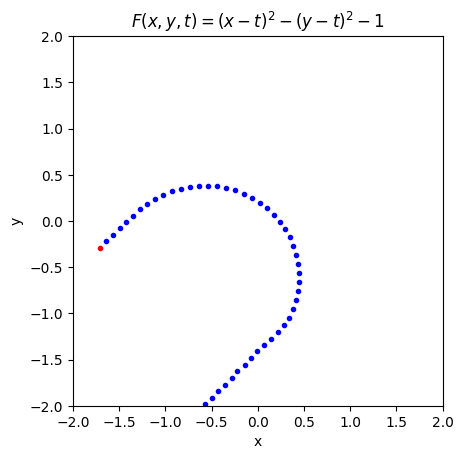

In [370]:
# Starting point
t_min = -1
# a, b, c boli dopocitane z prieniku E_u a F_t_min, vznika kvadraticka rovnica pre x, z ktorej dopocitame y
a = 2
b = 4 + 2 * math.sqrt(2)
c = 3 + 2 * math.sqrt(2)
x_start = -1 - math.sqrt(2)/2
# mame nastastie iba jeden koren, netreba vyberat
y_start = x_start + math.sqrt(2)
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

x = np.linspace(-axlim, axlim, 100)
plt.xlim(x[0],x[-1])
plt.ylim([-axlim,axlim])
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = (x-t)^2 - (y-t)^2 - 1$')

x, y, t = sp.symbols('x y t')
family_of_curves = (x-t)**2 + (y-t)**2  - 1
euler_method(family_of_curves, -1-math.sqrt(2)/2,-1+math.sqrt(2)/2, -1,1)

plt.show()
#print(pointsx)
#print(pointsy)